# Question 1: CLASSIFICATION KNN
I did the homeworks alone :(

In [15]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [16]:
from sklearn.datasets import make_blobs

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

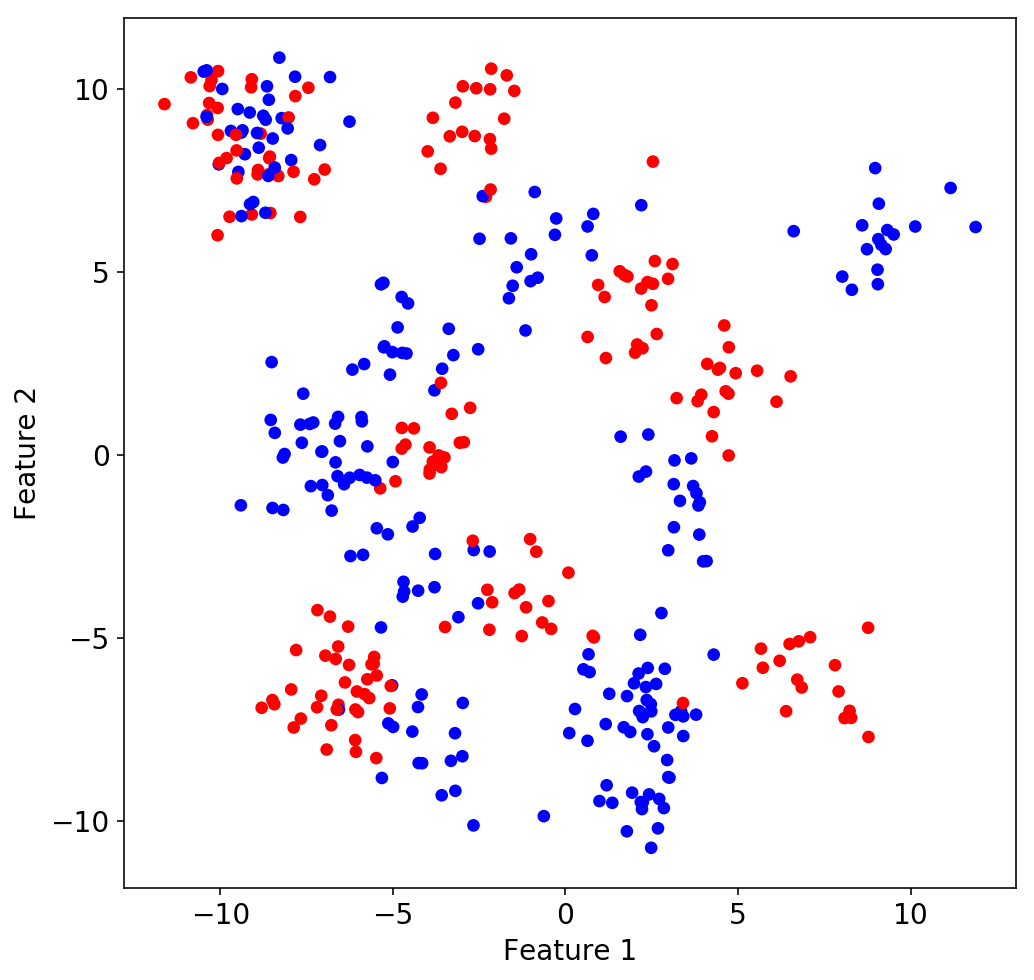

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Playing with the variables...

In [4]:
X, y = make_blobs(n_samples=400, centers=23, random_state=42)



In [5]:
y[:5]

array([11,  5,  0,  2, 17])

In [6]:
y[:10]

array([11,  5,  0,  2, 17, 15,  5, 16,  2, 17])

In [8]:
labels[:]

['b', 'r']

In [9]:
y = np.take(labels, (y < 10))

In [10]:
y[:10]

array(['b', 'r', 'r', 'r', 'b', 'b', 'r', 'b', 'r', 'b'], 
      dtype='<U1')

In [11]:
from sklearn.neighbors import KNeighborsClassifier


Randomly split the data sat in two parts (training set and test set) in order to avoid a bias in the splitting procedure. Then the plots of the two data sets are shown.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [13]:
X_train[:10]

array([[  2.88243384,  -5.84149123],
       [ -8.41759308,   0.60384808],
       [ -1.6966718 ,  10.37052616],
       [ -4.42651386,  -1.95522088],
       [ -6.22454913,  -2.76188317],
       [ -8.67982184,   9.15896249],
       [  3.70309446,  -0.84936842],
       [ -1.63495106,   4.28126552],
       [ -7.04157628,  -0.82220561],
       [ -4.25041221,  -8.41799859]])

In [14]:
X_test[:10]

array([[-7.79905143, -5.33017519],
       [-8.82532586,  8.77705699],
       [-5.95800273, -0.54626135],
       [-1.26342353, -4.94842698],
       [ 2.47782441, -6.80861806],
       [-2.48504664,  5.90698286],
       [-4.71075633, -3.87064103],
       [ 2.94867277, -8.33476488],
       [-9.51835248,  7.55577661],
       [ 9.32656995,  6.14382188]])

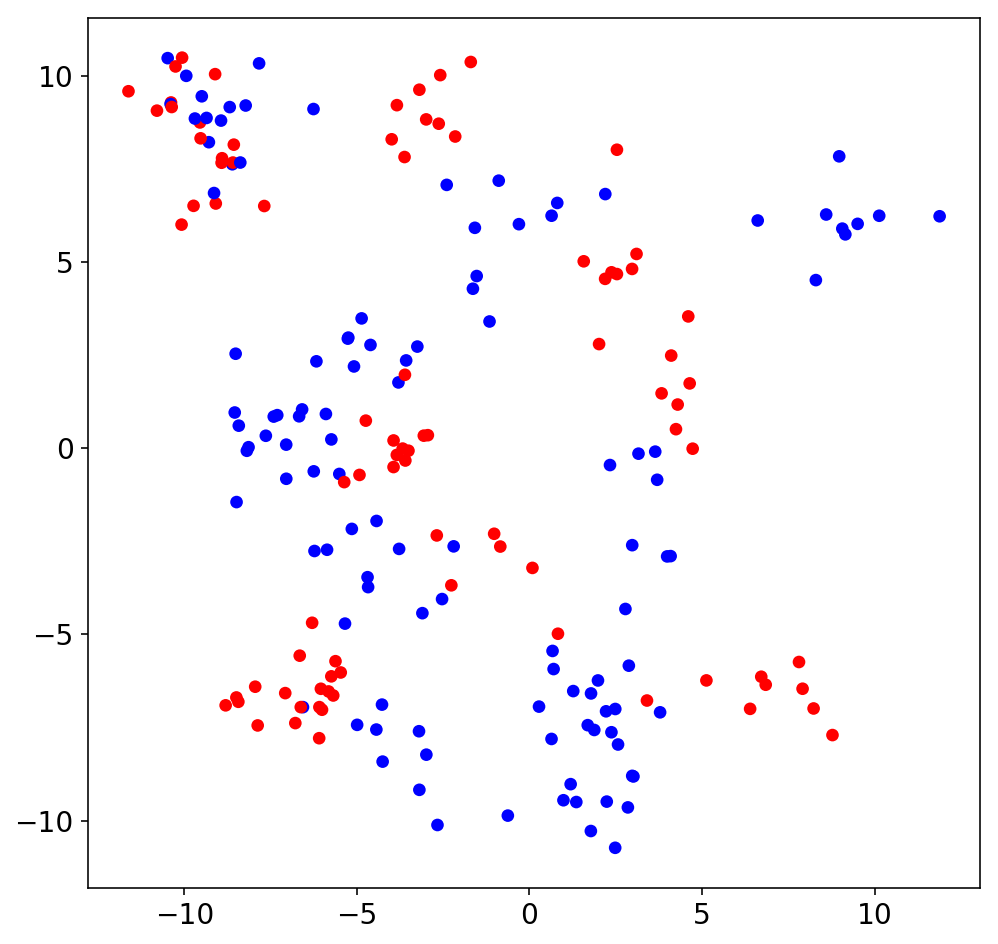

In [15]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, lw=0, s=40)

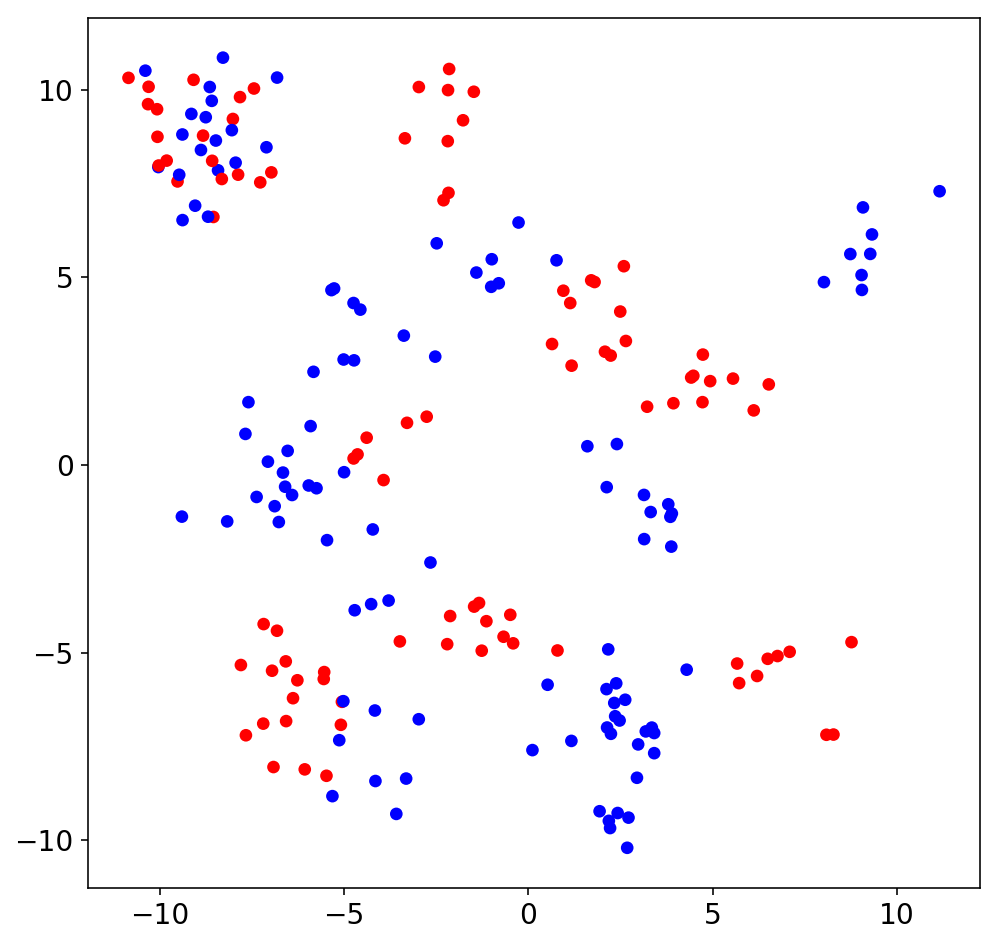

In [16]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, lw=0, s=40)

Compute the zero-one-loss after we fit our model (k-neighbors) to the training set.

The performance of the classifier can be looked at thanks to the zero-one-loss function. We see that the loss is larger in the predictions of the test set, than in the train test. This is not surprising since we fitted the model to the training set.

In [54]:
from sklearn.metrics import zero_one_loss

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print(zero_one_loss(y_train,clf.predict(X_train)))
#clf.fit(X_test,y_test)
print(zero_one_loss(y_test,clf.predict(X_test)))

0.0791666666667
0.15625


In [18]:
print(clf.predict([[3., -2.5]]))

['b']


In [19]:
print(clf.predict([[3., 2.5]]))

['r']


Evaluate the performance (accuracy) of the fit in the training and test data. We consider 50 disorder samples and evaluate the dependence on the number of neighbours used in the model and the size of the training data set after splitting. In the plot we show the mean accuracy as a function of the number of neighbours, i.e. as a function of the inverse complexity of the problem. Indeed, if we have only one neighbour then we have as many free parameters in the fit as number of data. On the other hand, if the number of neighbours is very large, the number of free parameters decrease and we consider more average properties of the data. So a classifier with 4 neighbours is more complicated than one with 10. 

In the plot, the dependence on the size of the data set is shown according to the linewidth: the thinner, the smaller the size of the training set. We see that the accuracy increases when the size of the training set increases. 

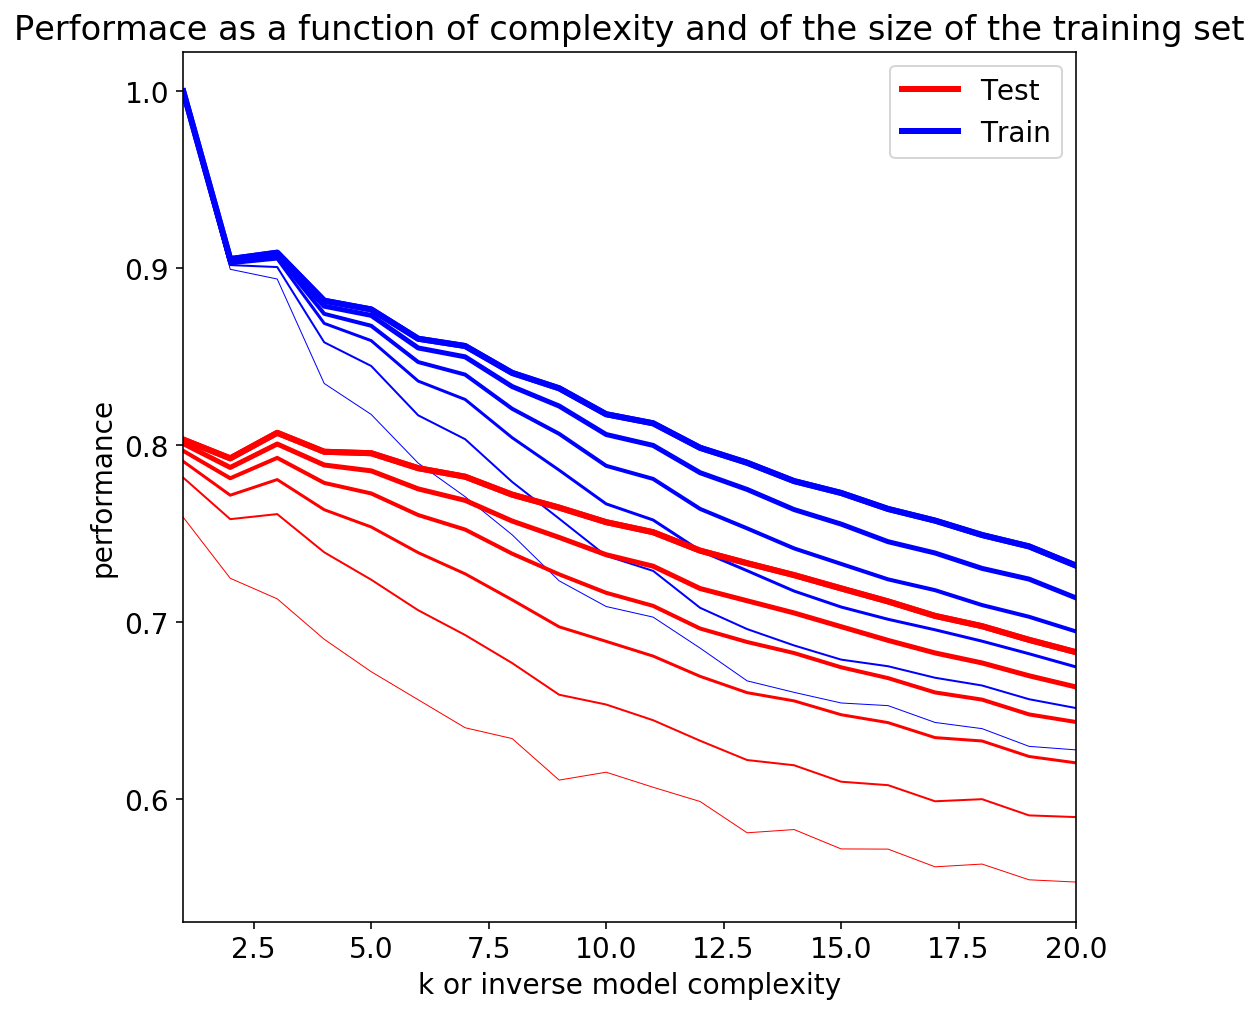

In [58]:
perf_test=[]
perf_train=[]
zol_test=[]
zol_train=[]
k=np.arange(1,21,1)
aa=np.arange(0.1,0.7,0.1)

for a in aa:
    for n in range(50):
        X,y=make_blobs(n_samples=400,centers=23,random_state=42+n)
        y=np.take(labels, (y<10))
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=a)
        train_scores=[]
        test_scores=[]
        train_zol=[]
        test_zol=[]
        for ki in k:
            clf=KNeighborsClassifier(n_neighbors=ki)
            clf.fit(X_train, y_train)
            train_scores.append(clf.score(X_train, y_train))
            test_scores.append(clf.score(X_test, y_test))
            train_zol.append(zero_one_loss(y_train,clf.predict(X_train)))
            test_zol.append(zero_one_loss(y_test,clf.predict(X_test)))

        perf_test.append(test_scores)
        perf_train.append(train_scores)
        zol_test.append(test_zol)
        zol_train.append(train_zol)
        #plt.plot(k, train_scores, c='b', alpha=0.1)
        #plt.plot(k, test_scores, c='r', alpha=0.1)
    
    plt.plot(k, np.array(perf_test).mean(axis=0), c='r', lw=5*a)
    plt.plot(k, np.array(perf_train).mean(axis=0), c='b', lw=5*a)
    #plt.plot(k, np.array(zol_test).mean(axis=0), c='r', ls='--', lw=5*a)
    #plt.plot(k, np.array(zol_train).mean(axis=0), c='b', ls='--', lw=5*a)
    plt.xlabel('k or inverse model complexity')
    plt.ylabel('performance')
    plt.xlim((1, max(ks)))
    
plt.plot(k, np.array(perf_test).mean(axis=0), label='Test', c='r', lw=5*a)
plt.plot(k, np.array(perf_train).mean(axis=0), label='Train', c='b', lw=5*a)
#plt.plot(k, np.array(zol_test).mean(axis=0), label='Test', c='r', ls='--', lw=5*a)
#plt.plot(k, np.array(zol_train).mean(axis=0), label='Train', c='b', ls='--', lw=5*a)
plt.legend(loc='best')
plt.title('Performace as a function of complexity and of the size of the training set')






Zero-one-loss is equal to 1-accuracy. 

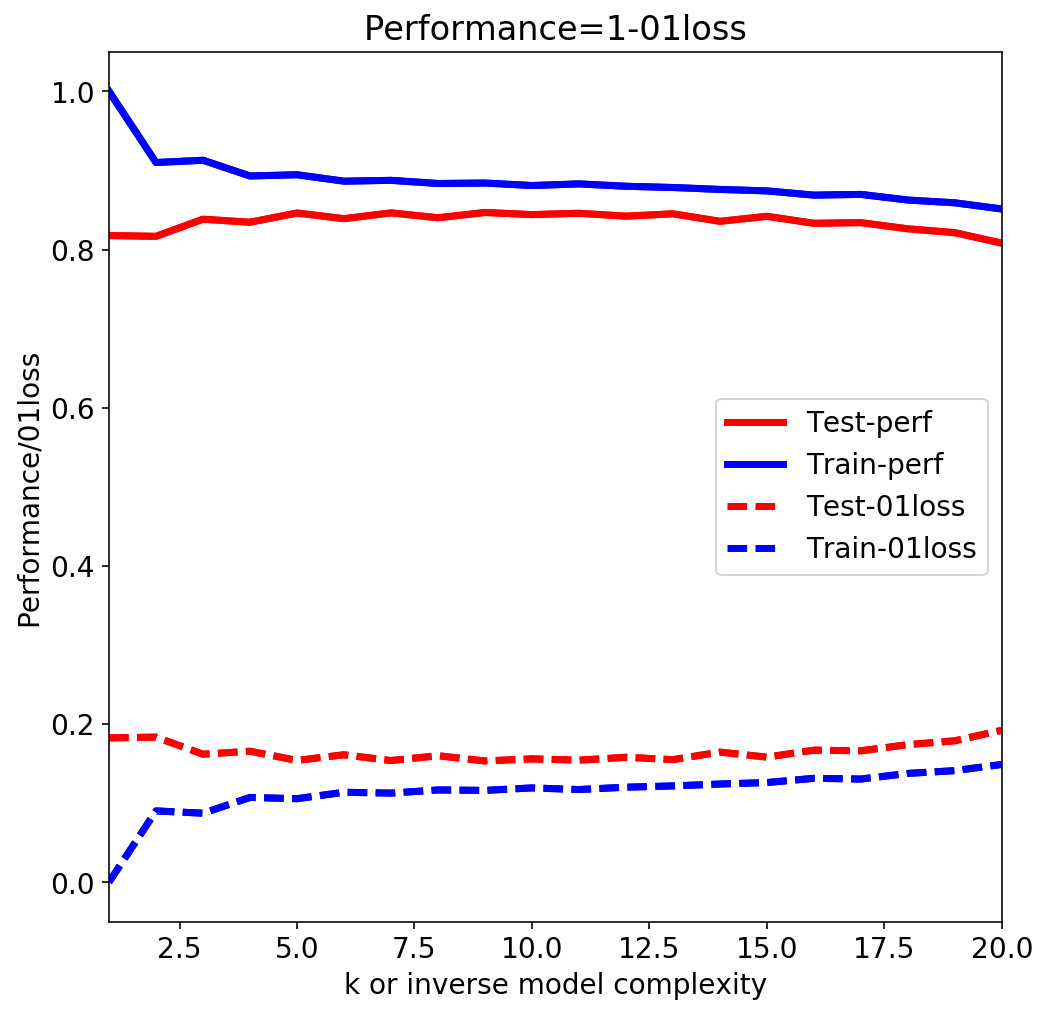

In [66]:
perf_test=[]
perf_train=[]
zol_test=[]
zol_train=[]
k=np.arange(1,21,1)
aa=[0.7]

for a in aa:
    for n in range(50):
        X,y=make_blobs(n_samples=400,centers=23,random_state=42+n)
        y=np.take(labels, (y<10))
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=a)
        train_scores=[]
        test_scores=[]
        train_zol=[]
        test_zol=[]
        for ki in k:
            clf=KNeighborsClassifier(n_neighbors=ki)
            clf.fit(X_train, y_train)
            train_scores.append(clf.score(X_train, y_train))
            test_scores.append(clf.score(X_test, y_test))
            train_zol.append(zero_one_loss(y_train,clf.predict(X_train)))
            test_zol.append(zero_one_loss(y_test,clf.predict(X_test)))

        perf_test.append(test_scores)
        perf_train.append(train_scores)
        zol_test.append(test_zol)
        zol_train.append(train_zol)
        #plt.plot(k, train_scores, c='b', alpha=0.1)
        #plt.plot(k, test_scores, c='r', alpha=0.1)
    
    plt.plot(k, np.array(perf_test).mean(axis=0), c='r', lw=5*a)
    plt.plot(k, np.array(perf_train).mean(axis=0), c='b', lw=5*a)
    plt.plot(k, np.array(zol_test).mean(axis=0), c='r', ls='--', lw=5*a)
    plt.plot(k, np.array(zol_train).mean(axis=0), c='b', ls='--', lw=5*a)
    plt.xlabel('k or inverse model complexity')
    plt.ylabel('Performance/01loss')
    plt.xlim((1, max(ks)))
    
plt.plot(k, np.array(perf_test).mean(axis=0), label='Test-perf', c='r', lw=5*a)
plt.plot(k, np.array(perf_train).mean(axis=0), label='Train-perf', c='b', lw=5*a)
plt.plot(k, np.array(zol_test).mean(axis=0), label='Test-01loss', c='r', ls='--', lw=5*a)
plt.plot(k, np.array(zol_train).mean(axis=0), label='Train-01loss', c='b', ls='--', lw=5*a)
plt.legend(loc='best')
plt.title('Performance=1-01loss')




In order to choose for the best number of neighbours in the model, we need to look at the maximum accuracy reached in the testing data set. We see that the curve has a maximum around k=10. The two performances both decrease when k increase, but we can see that as expected the performance is 1 for the training set and for k=1, while for the testing set and k=1 we don't get 1.

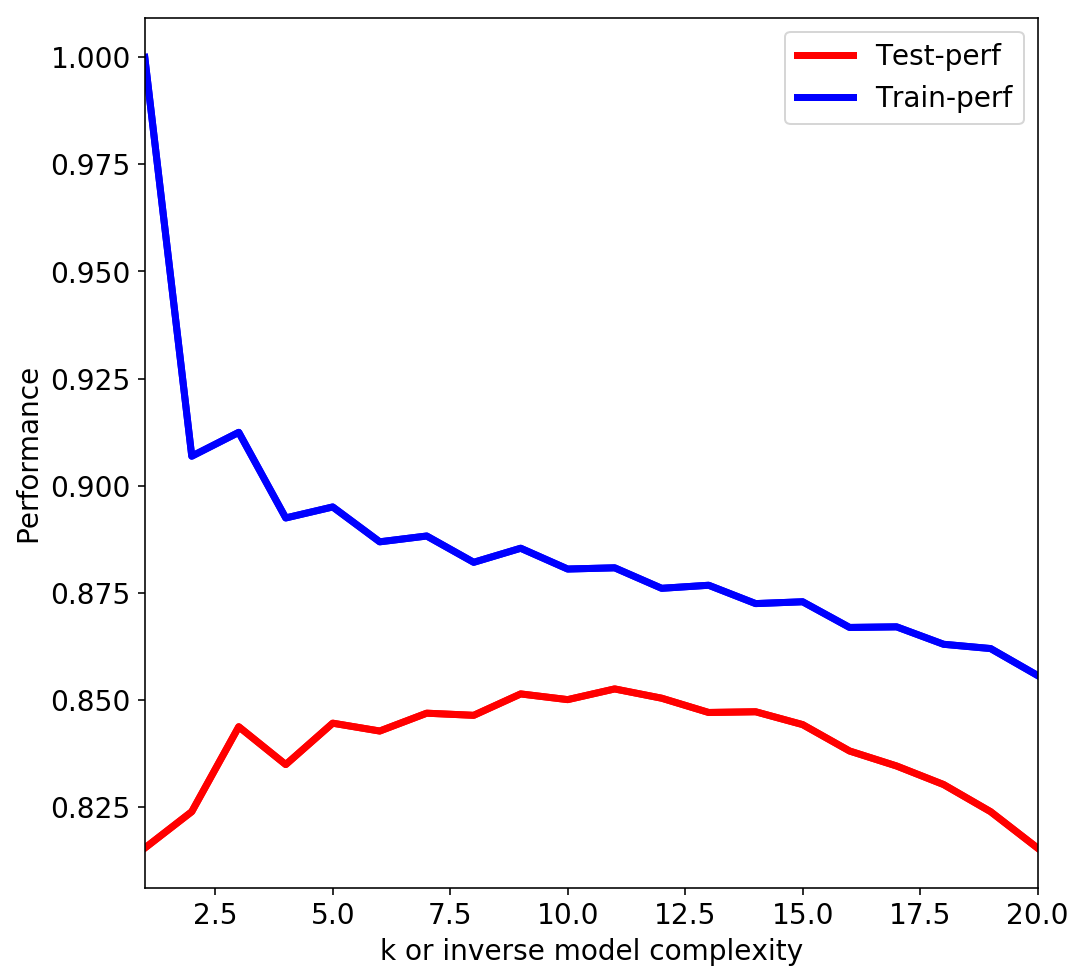

In [65]:
perf_test=[]
perf_train=[]
zol_test=[]
zol_train=[]
k=np.arange(1,21,1)
aa=[0.7]

for a in aa:
    for n in range(50):
        X,y=make_blobs(n_samples=400,centers=23,random_state=42+n)
        y=np.take(labels, (y<10))
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=a)
        train_scores=[]
        test_scores=[]
        train_zol=[]
        test_zol=[]
        for ki in k:
            clf=KNeighborsClassifier(n_neighbors=ki)
            clf.fit(X_train, y_train)
            train_scores.append(clf.score(X_train, y_train))
            test_scores.append(clf.score(X_test, y_test))
            train_zol.append(zero_one_loss(y_train,clf.predict(X_train)))
            test_zol.append(zero_one_loss(y_test,clf.predict(X_test)))

        perf_test.append(test_scores)
        perf_train.append(train_scores)
        zol_test.append(test_zol)
        zol_train.append(train_zol)
        #plt.plot(k, train_scores, c='b', alpha=0.1)
        #plt.plot(k, test_scores, c='r', alpha=0.1)
    
    plt.plot(k, np.array(perf_test).mean(axis=0), c='r', lw=5*a)
    plt.plot(k, np.array(perf_train).mean(axis=0), c='b', lw=5*a)
    plt.xlabel('k or inverse model complexity')
    plt.ylabel('Performance')
    plt.xlim((1, max(ks)))
    
plt.plot(k, np.array(perf_test).mean(axis=0), label='Test-perf', c='r', lw=5*a)
plt.plot(k, np.array(perf_train).mean(axis=0), label='Train-perf', c='b', lw=5*a)
plt.legend(loc='best')


# Question 2: REGRESSION KNN 

In [81]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

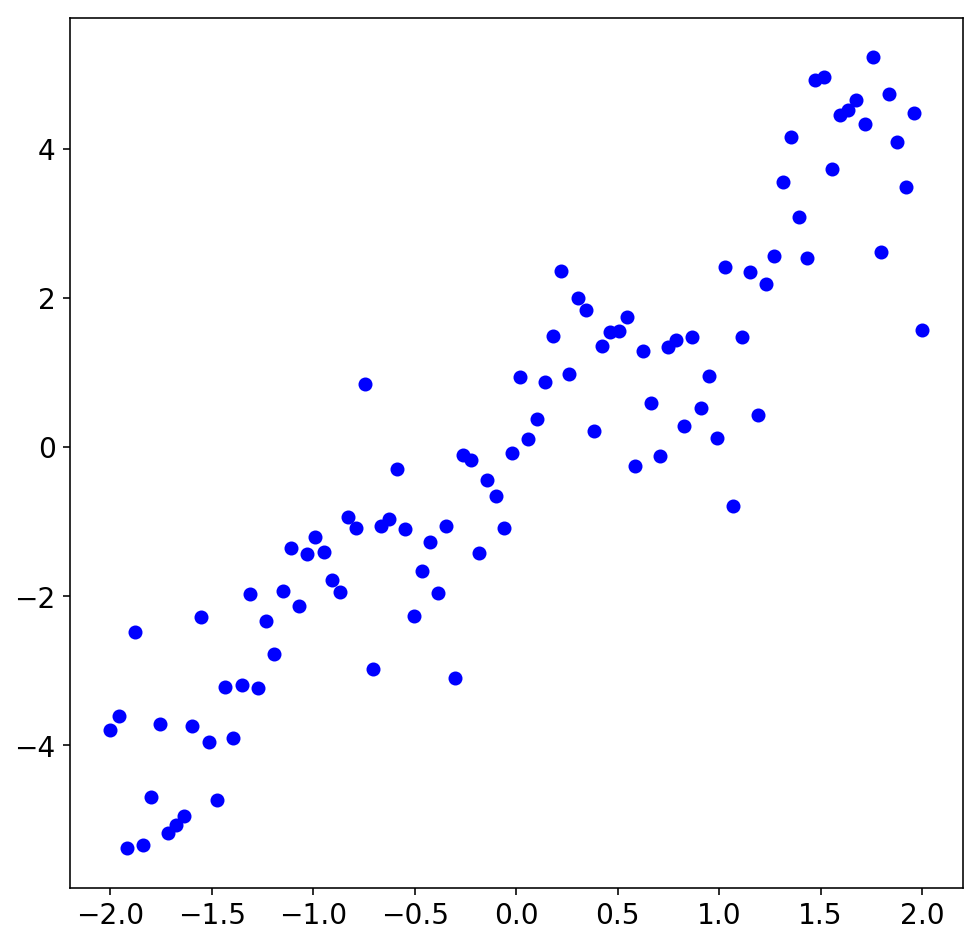

In [82]:
X,y=make_regression()
plt.plot(X,y,'ob')

Fitting the synthetic training data with a k-neighbours regressor. We compare the regression predictions to the location of the training and testing points as a function of the number of neighbours. In green we show the prediction for k=10, while for the other values of k we choose to have wider curves for larger values of k. We see that when k=1 then the prediction follows exactly the points in the training set, while when k is large the prediction is close to the average.

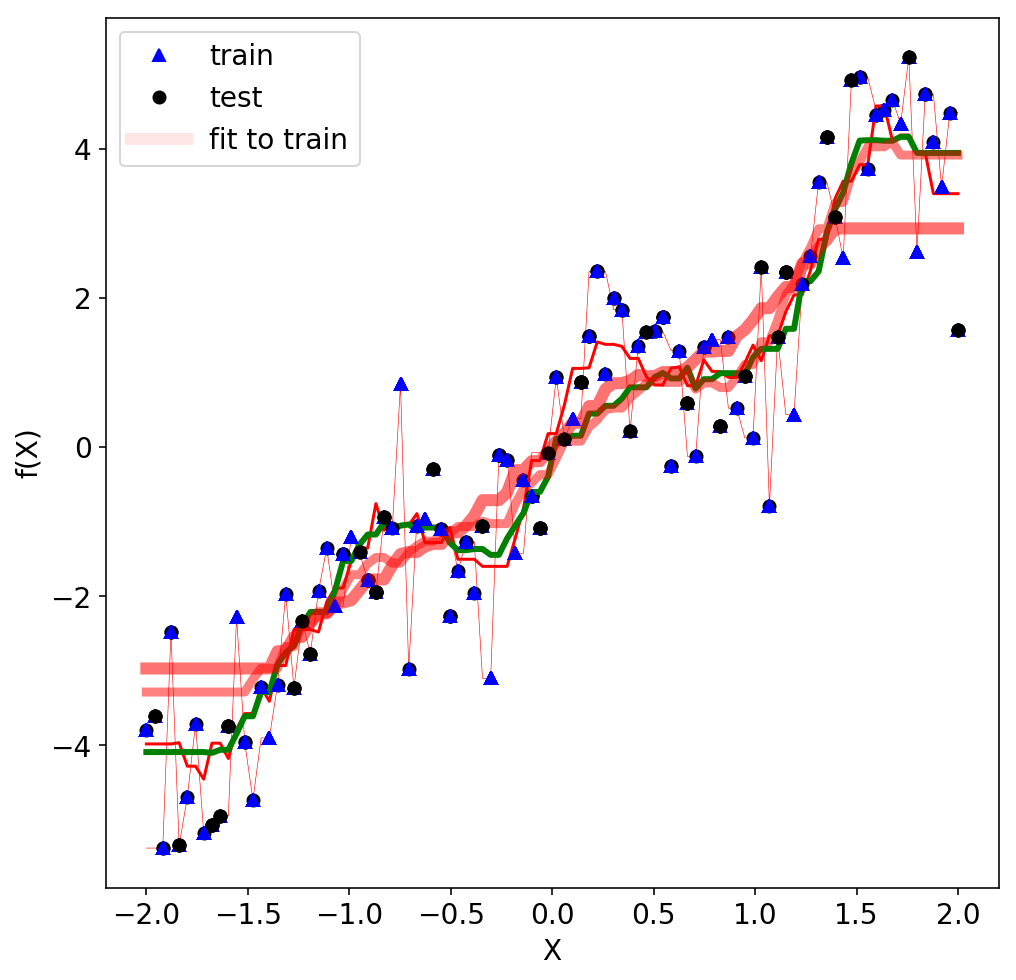

In [170]:
from sklearn.neighbors import KNeighborsRegressor
from numpy import log


line = np.linspace(-2, 2, 100).reshape(-1, 1)

k=[1,5,10,15,20]
for ki in k:
    X, y = make_regression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    rgr = KNeighborsRegressor(n_neighbors=ki)
    rgr.fit(X_train, y_train)
    plt.plot(X_train, y_train, '^b')
    plt.plot(X_test, y_test, 'ok')
    if ki==10:
        plt.plot(line, rgr.predict(line), '-g', lw=0.3*ki)
    elif ki<10:
        plt.plot(line, rgr.predict(line), '-r', lw=0.3*ki)
    if ki>10:
        plt.plot(line, rgr.predict(line), '-r', lw=0.3*ki,alpha=0.5)
    plt.xlabel("X")
    plt.ylabel("f(X)");

plt.plot(X_train, y_train, '^b', label='train')
plt.plot(X_test, y_test, 'ok', label='test')
plt.plot(line, rgr.predict(line),'-r',  label='fit to train', lw=0.3*ki, alpha=0.1)
plt.legend(loc='best')



In order to choose the best value of k, we plot the mean squared error for the training and test data sets. We then look at the test curve, and choose for the value of k that minimises the error. I don't see any plateau in the MSE of the training set, but I do see a plateau in the testing set. The plateau might be related to the fact that the data are generated from a periodic function (sine) and in between k=5-15 we are in the same period.

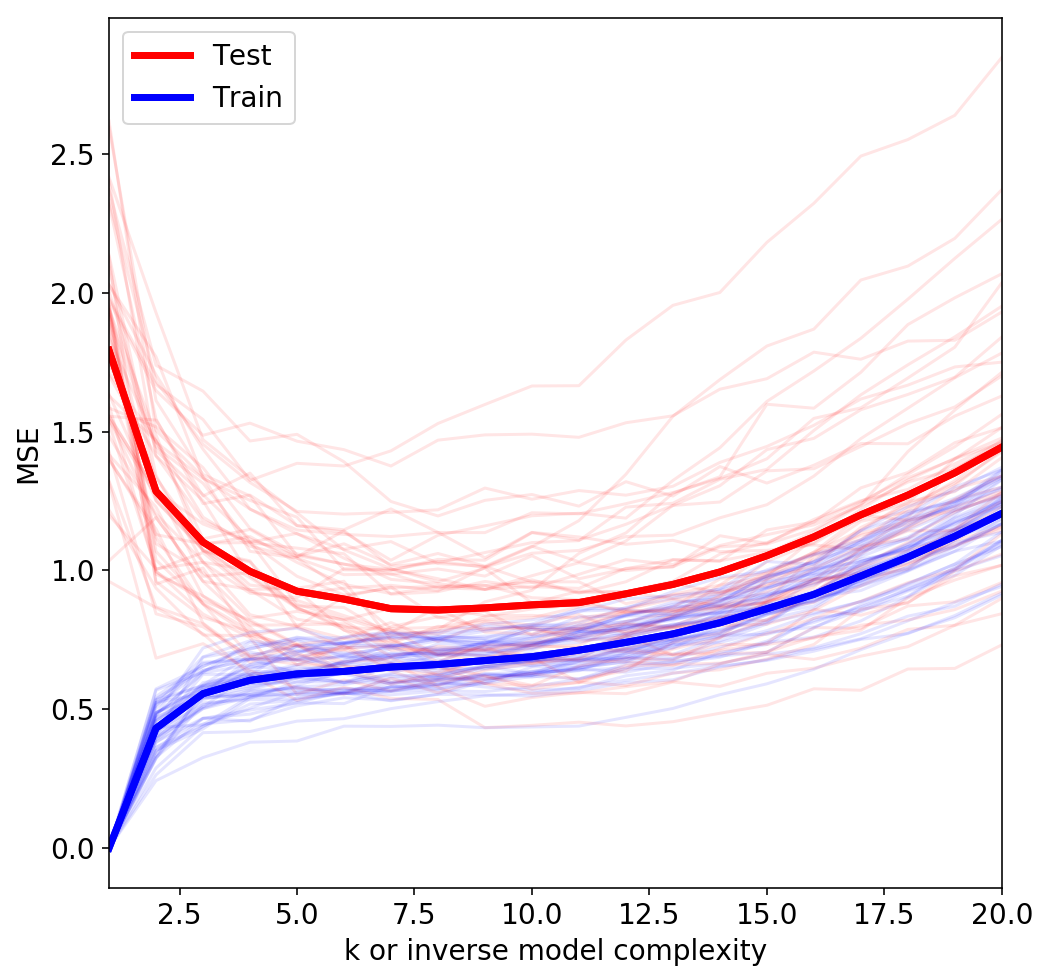

In [180]:
from sklearn.metrics import mean_squared_error

MSE_test=[]
MSE_train=[]
k=np.arange(1,21,1)
aa=[0.7]

for a in aa:
    for n in range(50):
        X, y = make_regression()
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=a)
        test_MSE=[]
        train_MSE=[]
        for ki in k:
            rgr = KNeighborsRegressor(n_neighbors=ki)
            rgr.fit(X_train, y_train)
            train_MSE.append(mean_squared_error(y_train, rgr.predict(X_train)))
            test_MSE.append(mean_squared_error(y_test, rgr.predict(X_test)))

        MSE_test.append(test_MSE)
        MSE_train.append(train_MSE)
        plt.plot(k, train_MSE, c='b', alpha=0.1)
        plt.plot(k, test_MSE, c='r', alpha=0.1)
        
    plt.plot(k, np.array(MSE_test).mean(axis=0), c='r', lw=5*a)
    plt.plot(k, np.array(MSE_train).mean(axis=0), c='b', lw=5*a)
    plt.xlabel('k or inverse model complexity')
    plt.ylabel('MSE')
    plt.xlim((1, max(ks)))
    
plt.plot(k, np.array(MSE_test).mean(axis=0), label='Test', c='r', lw=5*a)
plt.plot(k, np.array(MSE_train).mean(axis=0), label='Train', c='b', lw=5*a)
plt.legend(loc='best')





# Question 3: LOGISTIC REGRESSION

The difference between logistic regression and linear regression is that the variable we predict in the first case is discrete (binary, for example) and in the latter the variable is continous. 

In [18]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

from sklearn.utils import check_random_state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

My guess for the boundary is at the diagonal.

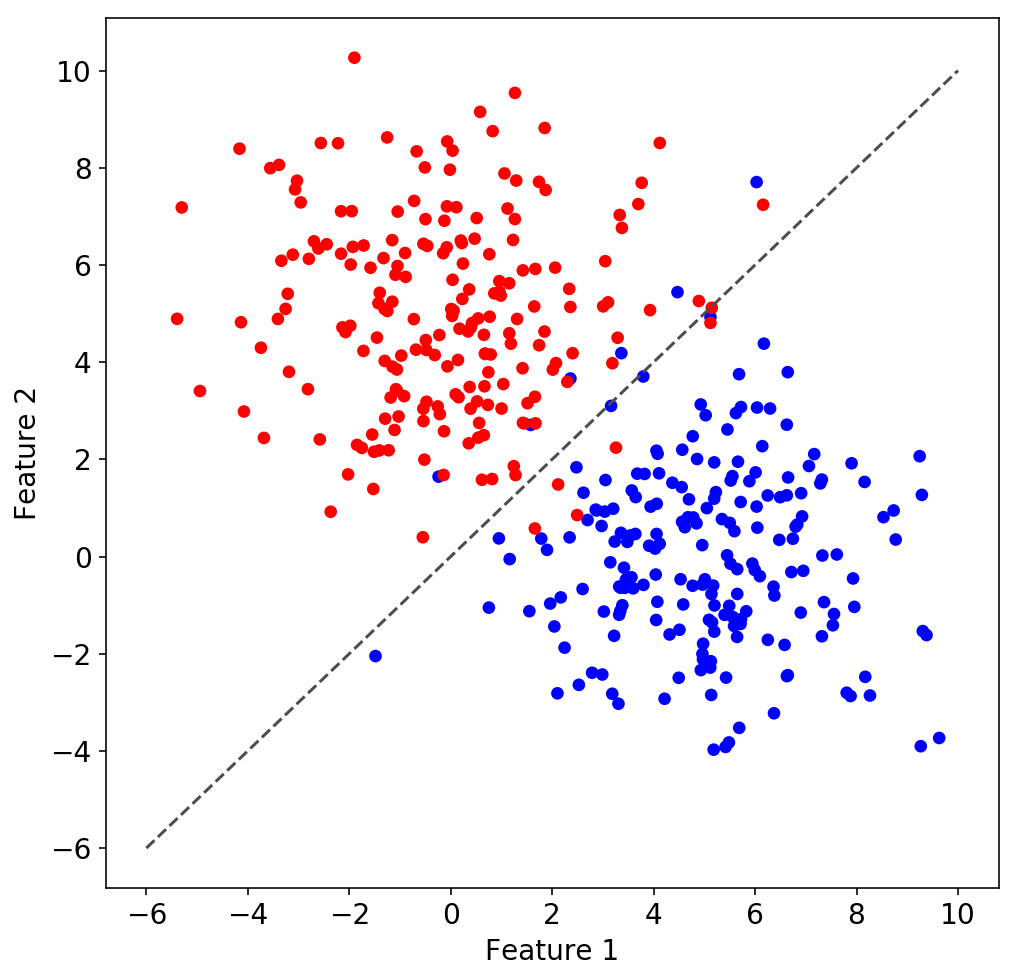

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.plot([-6, 10], [-6, 10], ls="--", c=".3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

I split the data sets with a training set containing 70% of the data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)



In [25]:
lrgr=LogisticRegression()
lrgr.fit(X_train,y_train)
print("Coef 1) %lg" % lrgr.coef_[0][0])
print("Coef 2) %lg" % lrgr.coef_[0][1])
print("Intercept 2) %lg" % lrgr.intercept_)

Coef 1) -1.34193
Coef 2) 1.16487
Intercept 2) 0.275758


Plotting the fitted boundary (dashed black) and my esteem (shaded dot-dash)

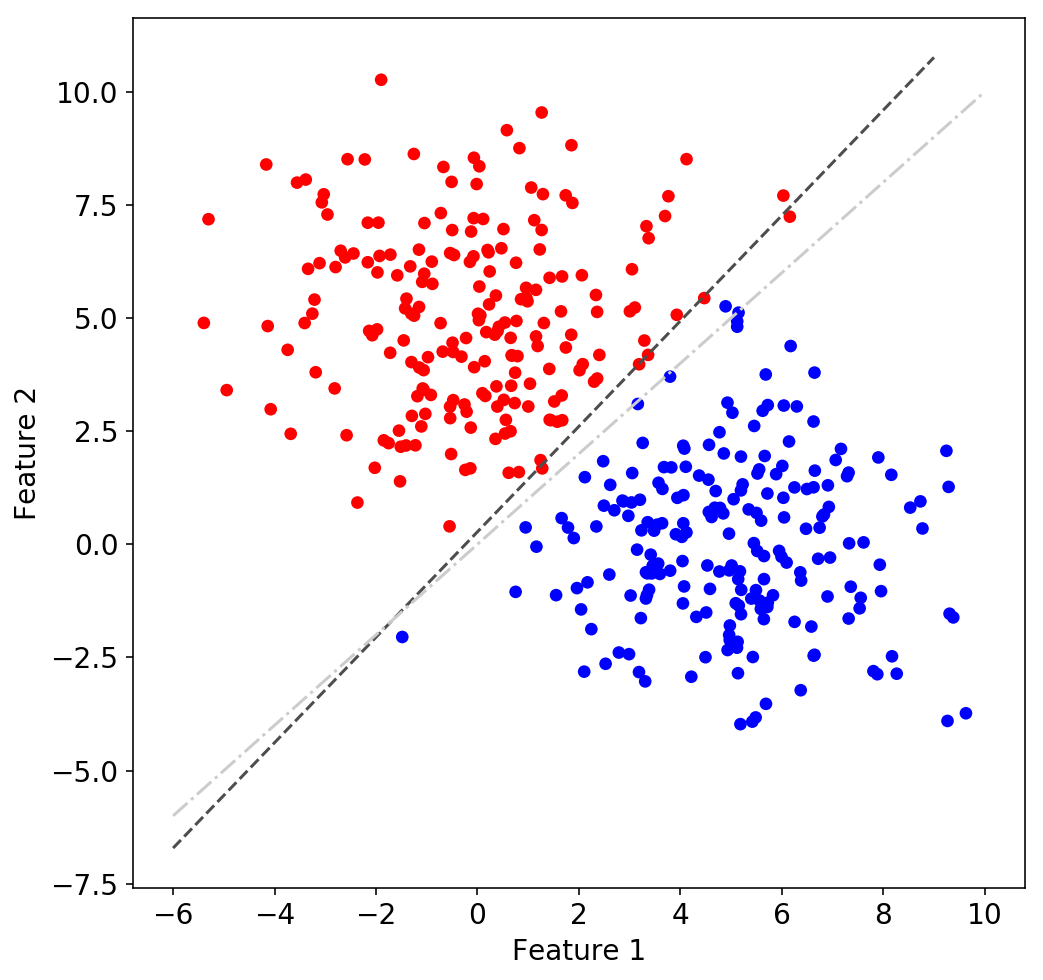

In [39]:
pr=lrgr.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pr, lw=0, s=40)

xx = np.arange(-6, 10)
pr_line=1.16487*xx+0.275758
plt.plot(xx,pr_line, ls="--", c=".3")
plt.plot([-6, 10], [-6, 10], ls="-.", c=".8")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

I don't know how to plot my probabilities on the squared grid, and then be able to use contourf to do the surface plot :(

/Users/riki/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


TypeError: Input z must be a 2D array.

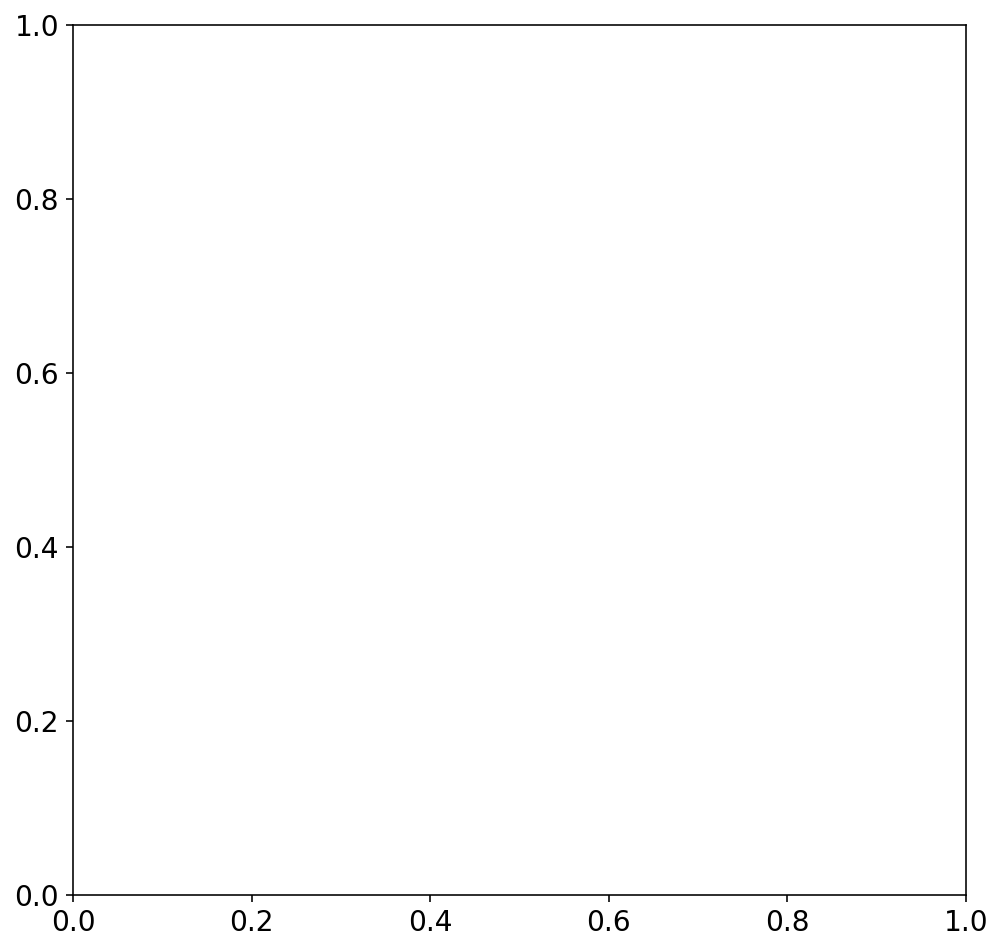

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.mlab as mlab
delta = 0.025
XX, YY = np.mgrid[-6:10:0.1, -6:10:0.1]
pr = lrgr.predict_proba(X_test)
labels1=[-1,1]
ZZ = np.take(labels1, (pr == 'b'))
CS = plt.contourf(XX,YY,ZZ)

Consider 20 disorder sample, fit each training data set to the model, extract the coefficients and plot them. 

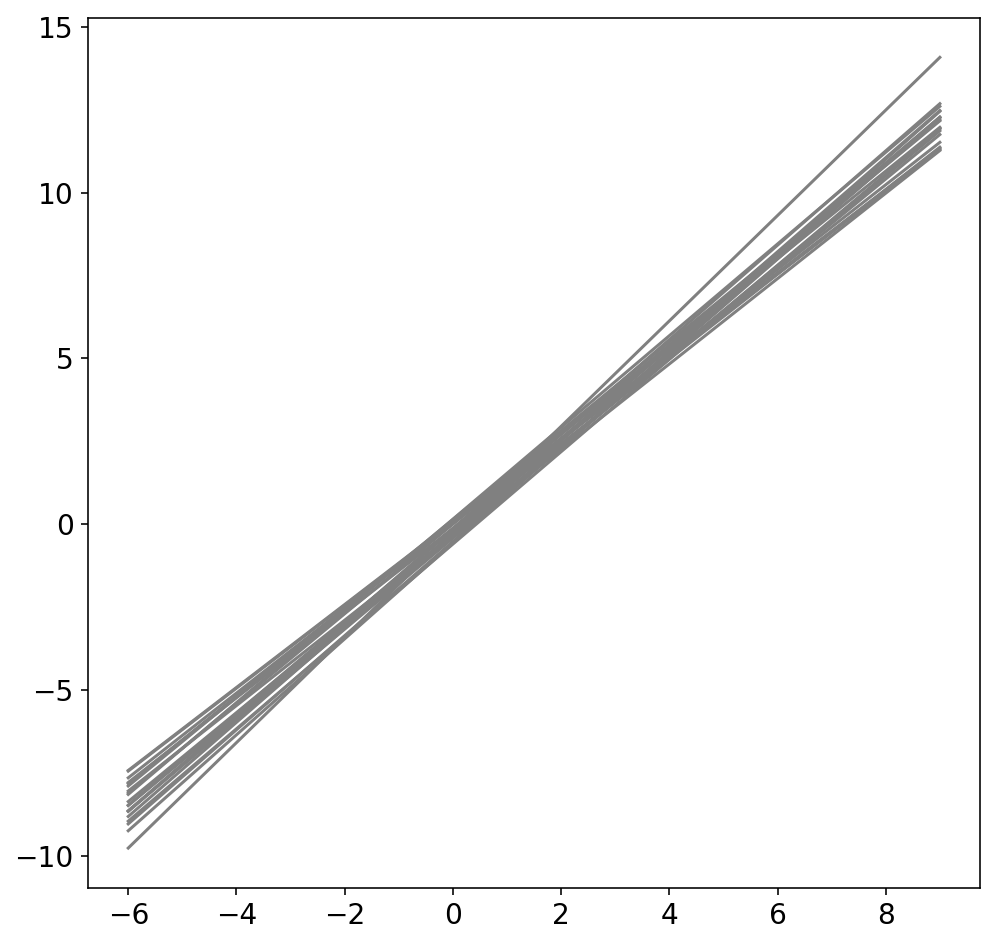

In [67]:
c1 = []
c2 = []
inter = []
M = np.arange(1,21,1)

for m in M:
    X, y = make_two_blobs(n_samples=400, cluster_std=2., random_state=42)
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7)
    
    lrgr = LogisticRegression()
    lrgr.fit(X_train, y_train)
    c1.append(lrgr.coef_[0][0])
    c2.append(lrgr.coef_[0][1])
    inter.append(lrgr.intercept_)
    xx = np.arange(-6, 10)
    pr_line=c1[m-1]*xx+inter[m-1]
    plt.plot(xx,pr_line, ls="-", c=".5")

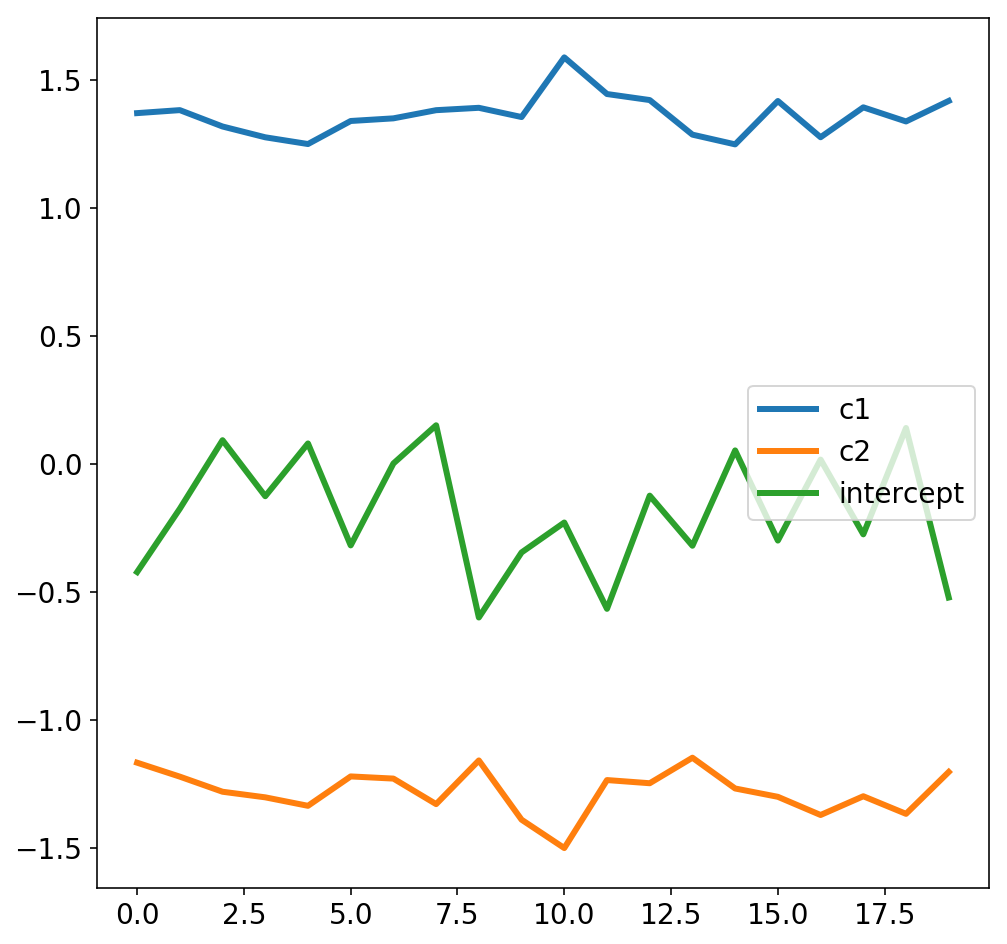

In [68]:
plt.plot(c1, label="c1", lw=3)
plt.plot(c2, label="c2", lw=3)
plt.plot(inter, label="intercept", lw=3)
plt.legend(loc='best')


The model seems to be a low variance one.